In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

In [11]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/Train',
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BATCH_SIZE,
class_mode='binary',
subset='training'
)

Found 915 images belonging to 2 classes.


In [12]:
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/Train',
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BATCH_SIZE,
class_mode='binary',
subset='validation'
)

Found 227 images belonging to 2 classes.


In [16]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE , IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.5901 - loss: 0.9391 - val_accuracy: 0.7048 - val_loss: 0.5833
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.7415 - loss: 0.4916 - val_accuracy: 0.7401 - val_loss: 0.4947
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.8251 - loss: 0.3627 - val_accuracy: 0.7974 - val_loss: 0.4440
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.8971 - loss: 0.2988 - val_accuracy: 0.7885 - val_loss: 0.3932
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.9349 - loss: 0.1794 - val_accuracy: 0.8370 - val_loss: 0.3585


In [20]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/BRAINTUMOR.h5')

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/brain_tumor_dataset/BRAINTUMOR.h5')
print("Model Loaded")

Model Loaded


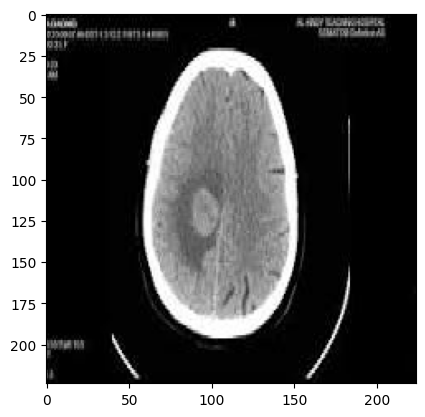

In [22]:
test_image_path = "/content/drive/MyDrive/scan.jpeg"
img = image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [23]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/= 255.

In [24]:
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
[[0.84102756]]


In [25]:
if prediction >= 0.5:
  print("you have brain tumor.")
else:
  print("you dont have a brain tumor.")

you have brain tumor.
